<a href="https://colab.research.google.com/github/Symiooo/Investment-Principles-Applied/blob/main/Stat_Data_Exploration_PDF_ECDF_20210919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration using ECDFs and PDFs

Every data scientist usually starts by examining one variable at a time, finding out what the variables mean, looking at distributions of the values, and choosing appropriate summary statistics.

PDFs and especially ECDFs are both great methods to start your exploration journey!


Before we dive into the various distribution functions, I want to present the "big picture" what topics we will cover in this notebook:

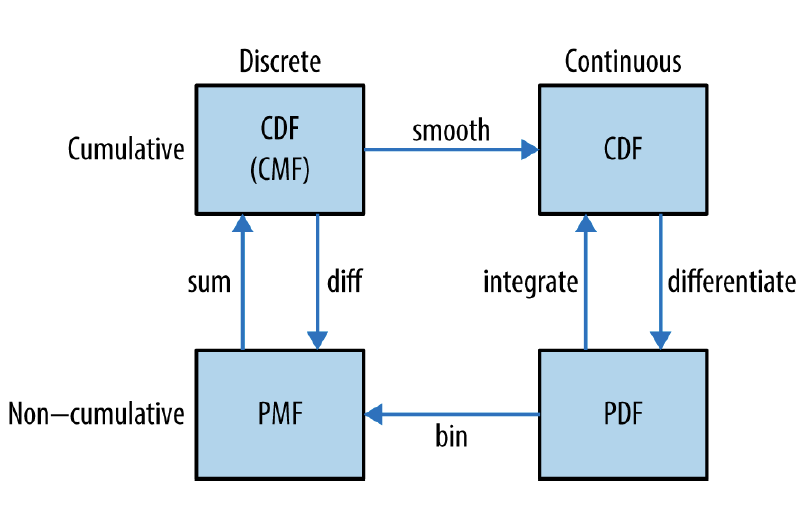

- We started with **PMFs**, which represent the probabilities for a discrete set of values.
- A **PDF** is the derivative of a continuous CDF; or, equivalently, a CDF is the integral of a PDF.
- To get from a discrete to a continuous distribution, you can perform various kinds of smoothing. One option is k**ernel density estimation (KDE)**.

## 1) Data Preprocessing

In [ ]:
from google.colab import files
files.upload()

Saving DAX_Screening_2020_0705.csv to DAX_Screening_2020_0705.csv


{'DAX_Screening_2020_0705.csv': b'\xef\xbb\xbfUnternehmen;Sektor;Industrie;Jahr;WACC_cMR;WACC_15yMR;WACC_10yMR;WACC_GB_nSt;WACC_GB_vSt;Eigenkapitalquote_MKT; Fremdkapitalquote_MKT ;CAPM_cMR;CAPM_15yMR;CAPM_10yMR;Beta;risikoloser Zins;Spalte12;Spalte5;Spalte6;Spalte7;Spalte8;Spalte3;Spalte4;Spalte2;Spalte1;Jahr2;WACC_calc_constDAI;WACC_calc_15YDAI;WACC_calc_10YDAI;WACC_calc_constMRP;WACC_GB_nSt.;WACC_GB_vSt2;Bilanzsumme_BW;Eigenkapital_BW;Fremdkapital_BW;EK-Quote_BW;FK-Quote_BW;Gesamtkapital_MKT;Marktkapitalisierung;FK-Kosten_bereinigt;EK-Quote_MKT;FK-Quote_MKT;Aktienanzahl;Aktienkurs;FK-Kosten_unbereinigt;Zinsaufwand;FK_zinstragend;EK-Kosten_MRP_konstant;EK-Kosten_10J_DAI;Beta2;Steuersaetze;Marktrendite_Mittel;Marktrendite_1Y;Marktrendite_10Y_DAI;Zinssatz_risikofrei;Investitionsquote;Umsatzerloese\r\nAdidas AG;Consumer Cyclical;Footwear & Accessories;2004;0,0513;0,0472;0,0443;0,07;;0,326;0,674;0,0711;0,0585;0,0495;0,5;0,041;;;;;;;;;;2004;0,046477695;0,046151447;0,045662075;0,05084942;0

In [ ]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dax_df = pd.read_csv("DAX_Screening_2020_0705.csv", sep = ";", decimal = ",", error_bad_lines = False)
dax_df.head()

,Unternehmen,Sektor,Industrie,Jahr,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_GB_nSt,WACC_GB_vSt,Eigenkapitalquote_MKT,Fremdkapitalquote_MKT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,risikoloser Zins,Spalte12,Spalte5,Spalte6,Spalte7,Spalte8,Spalte3,Spalte4,Spalte2,Spalte1,Jahr2,WACC_calc_constDAI,WACC_calc_15YDAI,WACC_calc_10YDAI,WACC_calc_constMRP,WACC_GB_nSt.,WACC_GB_vSt2,Bilanzsumme_BW,Eigenkapital_BW,Fremdkapital_BW,EK-Quote_BW,FK-Quote_BW,Gesamtkapital_MKT,Marktkapitalisierung,FK-Kosten_bereinigt,EK-Quote_MKT,FK-Quote_MKT,Aktienanzahl,Aktienkurs,FK-Kosten_unbereinigt,Zinsaufwand,FK_zinstragend,EK-Kosten_MRP_konstant,EK-Kosten_10J_DAI,Beta2,Steuersaetze,Marktrendite_Mittel,Marktrendite_1Y,Marktrendite_10Y_DAI,Zinssatz_risikofrei,Investitionsquote,Umsatzerloese
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,NaN,0.326,0.674,0.0711,0.0585,0.04950,0.50,0.0410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,0.046478,0.046151,0.045662,0.050849,0.070,NaN,4427.0,1628.0,2799.0,0.367743,0.632257,4154.3485,1355.3485,0.067074,0.326248,0.673752,45.65,29.69,0.025473,71.3,1063.0,0.072750,0.076500,0.50,0.378,0.1048,0.073,0.073,0.0407,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,NaN,0.381,0.619,0.0716,0.0500,0.05717,0.51,0.0407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,0.044717,0.041026,0.047243,0.049924,0.081,NaN,5722.0,2684.0,3038.0,0.469067,0.530933,4907.6000,1869.6000,0.062606,0.380960,0.619040,46.74,40.00,0.024358,74.0,1182.0,0.070010,0.084086,0.51,0.337,0.1048,0.271,0.091,0.0338,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,NaN,0.581,0.419,0.0729,0.0687,0.06698,0.58,0.0338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,0.052556,0.057944,0.055250,0.061581,0.075,NaN,8372.0,2828.0,5544.0,0.337793,0.662207,13217.9047,7673.9047,0.067847,0.580569,0.419431,203.39,37.73,0.033189,184.0,2712.0,0.076660,0.089072,0.58,0.314,0.1048,0.220,0.086,0.0378,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,NaN,0.664,0.336,0.0397,0.0397,0.03925,0.03,0.0378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,0.043897,0.044335,0.043658,0.044430,0.075,NaN,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0234,10436.0234,0.074890,0.663573,0.336427,203.59,51.26,0.032130,170.0,2270.0,0.044175,0.044073,0.03,0.318,0.1048,0.223,0.066,0.0423,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,NaN,0.466,0.534,0.0712,0.0784,0.05391,0.49,0.0423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,0.055372,0.064057,0.036630,0.061497,0.083,NaN,9519.0,3386.0,6133.0,0.355710,0.644290,11494.7784,5361.7784,0.075046,0.466453,0.533547,197.56,27.14,0.033100,203.0,2705.0,0.071752,0.041617,0.49,0.288,0.1048,-0.404,-0.004,0.0400,0.093666,10799.0


**Compute the missing values as percentage**

In [ ]:
dax_df = dax_df.iloc[:, : 16]
dax_df.shape

(510, 16)

In [ ]:
for column in dax_df.columns:
  percentage = dax_df[column].isnull().mean()
  print(f"{column}: {round(percentage*100, 2)}%")

Unternehmen: 0.0%
Sektor: 0.0%
Industrie: 0.0%
Jahr: 0.0%
WACC_cMR: 0.0%
WACC_15yMR: 0.0%
WACC_10yMR: 0.0%
WACC_GB_nSt: 49.61%
WACC_GB_vSt: 73.14%
Eigenkapitalquote_MKT: 0.0%
 Fremdkapitalquote_MKT : 0.0%
CAPM_cMR: 0.0%
CAPM_15yMR: 0.0%
CAPM_10yMR: 0.0%
Beta: 0.0%
risikoloser Zins: 0.0%


In [ ]:
betas = dax_df[["Unternehmen", "Sektor", "Industrie", "Jahr", "Beta"]]

betas.head()

,Unternehmen,Sektor,Industrie,Jahr,Beta
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.50
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.51
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.58
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.03
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.49


## 2) Distributions & Summary Statistics

**Summarizing Distributions**

- A histogram is a complete description of the distribution of a sample; that is, given a histogram, we could reconstruct the values in the sample (although not their order).
- If the details of the distribution are important, it might be necessary to present a histogram. But often we want to summarize the distribution with a few descriptive statistics.


**Distributions**:
- ***Distributions:*** are descriptions where a variables values that appear in the dataset and how many times each value appears are plotted.
- The most common representation of a distribution is a ***histogram***, which is a graph that shows the frequency of each value.
- When you start working with a new dataset, I suggest you explore the variables you are planning to use one at a time, and a good way to start is by looking at histograms.
- The distribution is approximately bell-shaped, which is the shape of the ***normal distribution***, also called a Gaussian distribution.
- A uniform distribution is where all values should have the same frequency.
____________________________________

**Outliers**:
- Looking at histograms, it is easy to identify the most common values and the shape of the distribution, but rare values are not always visible.
- Outliers are extreme values that might be errors in measurement and recording, or might be accurate reports of rare events.
- The best way to handle outliers depends on “domain knowledge”; that is, information about where the data come from and what they mean.
____________________________________
**Summary characteristics**:
- ***Central tendency:*** Do the values tend to cluster around a particular point?
- ***Modes:*** Is there more than one cluster?
- ***Spread:*** How much variability is there in the values?
- ***Tails***: How quickly do the probabilities drop off as we move away from the modes?
- ***Outliers:*** Are there extreme values far from the modes?
____________________________________

**Summary Statistics**:
- Any time you take a ***sample and reduce it to a single number**+, that number is a statistic.
- ***Mean*** -> to quantify central tendency of a distribution
- ***Variance*** -> to describe the spread of a distribution, quantified using standard deviation as sqrt of variance.
- ***Effect Size*** -> to describe the difference of two groups (i.e. size of the effect) quantified using difference_of_means, of difference_of_variability (Cohen's d).
______________________________________
**Effect Size implemented**:

```
# Define function for Cohen's d to measure Effect size:
def cohen_d(group1, group2):
  diff = np.mean(group1) - np.mean(group2)
  var1 = group1.var()
  var2 = group2.var()
  n1, n2 = len(group1), len(group2)
  pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
  d = diff / np.sqrt(pooled_var)
  return d

# A result could be: In this example, the difference in means is 0.029 standard deviations, which is small.
```

______________________________________
**Glossary:**
- ***Histogram***: A mapping from values to frequencies, or a graph that shows this mapping.
- ***Mode***: The most frequent value in a sample, or one of the most frequent values.
- ***Effect size***: A summary statistic intended to quantify the size of an effect like a difference between
groups.
- ***Normal distribution***: An idealization of a bell-shaped distribution; also known as a Gaussian distribution.
- *Uniform distribution*: A distribution in which all values have the same frequency.
- ***Tail***: The part of a distribution at the high and low extremes.
- ***Central tendency***: A characteristic of a sample or population; intuitively, it is an average or typical
value.
- ***Outlier***: A value far from the central tendency
- ***Spread***: A measure of how spread out the values in a distribution are.
__________________________

**Data Preprocessing**

In [ ]:
# Subset Dataframes for respective years: 2004, 2012, 2020 #####################
betas_2004_df = betas.loc[betas["Jahr"] == 2004, ["Beta"]]
betas_2014_df = betas.loc[betas["Jahr"] == 2014, ["Beta"]]
betas_2020_df = betas.loc[betas["Jahr"] == 2020, ["Beta"]]

**Computation of Summary Statistics**

In [ ]:
# Computation of the Mean
mean_2004 = np.mean(betas_2004_df["Beta"])
mean_2014 = np.mean(betas_2014_df["Beta"])
mean_2020 = np.mean(betas_2020_df["Beta"])

## Computation of the Mean
median_2004 = np.median(betas_2004_df["Beta"])
median_2014 = np.median(betas_2014_df["Beta"])
median_2020 = np.median(betas_2020_df["Beta"])

# Computation of the 95%-Confidence Interval
ci_2004 = np.percentile(betas_2004_df["Beta"], [2.5, 97.5])
ci_2014 = np.percentile(betas_2014_df["Beta"], [2.5, 97.5])
ci_2020 = np.percentile(betas_2020_df["Beta"], [2.5, 97.5])

print("Means:", [round(mean_2004, 4), round(mean_2014, 4), round(mean_2020, 4)])
print("Medians:", [median_2004, median_2014, median_2020])
print("95%-CI:", [ci_2004, ci_2014, ci_2020])

Means: [0.822, 0.964, 0.9407]
Medians: [0.82, 0.915, 0.92]
95%-CI: [array([0.2245, 1.4575]), array([0.32075, 1.6585 ]), array([0.50625, 1.414  ])]


**Visualization of Summary Statistics**

No handles with labels found to put in legend.


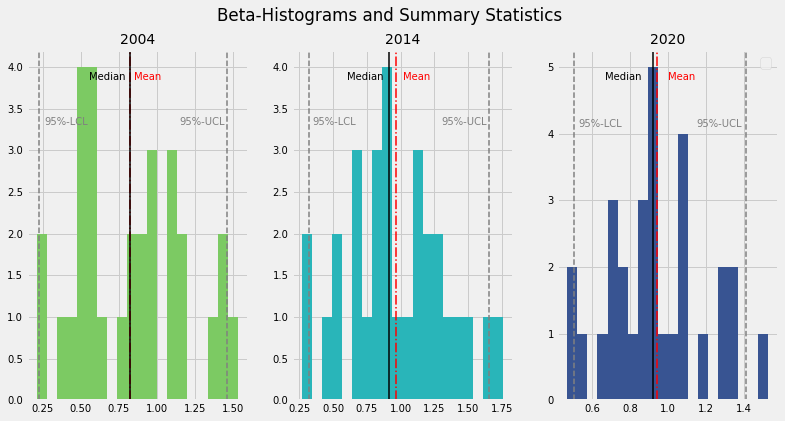

In [ ]:
# Create Figure Grid
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,6))
# Define Plot style
plt.style.use("fivethirtyeight")

# Plot histograms ##############################################################
ax[0].hist(betas_2004_df["Beta"], bins = 20, color = "#7CCA63")
ax[1].hist(betas_2014_df["Beta"], bins = 20, color = "#29B5B9")
ax[2].hist(betas_2020_df["Beta"], bins = 20, color = "#385492")

# Plot Summary Statistics ######################################################
# Plot Means
ax[0].axvline(x = mean_2004, color = "red", linestyle = "-.", linewidth = 1.5)
ax[1].axvline(x = mean_2014, color = "red", linestyle = "-.", linewidth = 1.5)
ax[2].axvline(x = mean_2020, color = "red", linestyle = "-.", linewidth = 1.5)
# Plot Medians
ax[0].axvline(x = median_2004, color = "black", linestyle = "-", linewidth = 1.5)
ax[1].axvline(x = median_2014, color = "black", linestyle = "-", linewidth = 1.5)
ax[2].axvline(x = median_2020, color = "black", linestyle = "-", linewidth = 1.5)
# Plot 95%-Confidence Intervals: LCL
ax[0].axvline(x = ci_2004[0], color = "gray", linestyle = "--", linewidth = 1.5)
ax[1].axvline(x = ci_2014[0], color = "gray", linestyle = "--", linewidth = 1.5)
ax[2].axvline(x = ci_2020[0], color = "gray", linestyle = "--", linewidth = 1.5)
# Plot 95%-Confidence Intervals: UCL
ax[0].axvline(x = ci_2004[1], color = "gray", linestyle = "--", linewidth = 1.5)
ax[1].axvline(x = ci_2014[1], color = "gray", linestyle = "--", linewidth = 1.5)
ax[2].axvline(x = ci_2020[1], color = "gray", linestyle = "--", linewidth = 1.5)

# Customize Figure Layout ######################################################
# Annotate Summary Statistics
ax[0].annotate("Mean", xytext = (0.85, 3.85), xy = (0.85, 3.85), color = "red", size = 10)
ax[0].annotate("Median", xytext = (0.55, 3.85), xy = (0.55, 3.85), color = "black", size = 10)
ax[0].annotate("95%-LCL", xytext = (0.26, 3.3), xy = (0.26, 3.3), color = "gray", size = 10)
ax[0].annotate("95%-UCL", xytext = (1.15, 3.3), xy = (1.15, 3.3), color = "gray", size = 10)

ax[1].annotate("Mean", xytext = (1.02, 3.85), xy = (1.02, 3.85), color = "red", size = 10)
ax[1].annotate("Median", xytext = (0.6, 3.85), xy = (0.6, 3.85), color = "black", size = 10)
ax[1].annotate("95%-LCL", xytext = (0.35, 3.3), xy = (0.35, 3.3), color = "gray", size = 10)
ax[1].annotate("95%-UCL", xytext = (1.3, 3.3), xy = (1.3, 3.3), color = "gray", size = 10)

ax[2].annotate("Mean", xytext = (1, 4.8), xy = (1, 4.8), color = "red", size = 10)
ax[2].annotate("Median", xytext = (0.67, 4.8), xy = (0.67, 4.8), color = "black", size = 10)
ax[2].annotate("95%-LCL", xytext = (0.53, 4.1), xy = (0.53, 4.1), color = "gray", size = 10)
ax[2].annotate("95%-UCL", xytext = (1.15, 4.1), xy = (1.15, 4.1), color = "gray", size = 10)

# Reduce tick label size
ax[0].tick_params(axis = "both", labelsize = 10)
ax[1].tick_params(axis = "both", labelsize = 10)
ax[2].tick_params(axis = "both", labelsize = 10)
# Add Titles
ax[0].set_title("2004", fontsize = 14)
ax[1].set_title("2014", fontsize = 14)
ax[2].set_title("2020", fontsize = 14)
plt.suptitle("Beta-Histograms and Summary Statistics")

plt.legend()
plt.show()

## 3) Probability Mass Functions (PMFs)

- Another way to represent a distribution is a probability mass function (PMF), which maps from **each value to its probability**. 
- A **probability is a frequency expressed as a fraction** of the sample size, n. To get from frequencies to probabilities, we divide through by n, which is called normalization.
- Probability **mass and density** functions are used to describe **discrete and continuous** probability distributions, respectively
- The biggest difference is that a Hist maps from values to integer
counters; a Pmf maps from values to floating-point probabilities.
- Thus, **the Probability Mass Function (PMF) provides the probability distribution for discrete variables.**

_____________________________
**Advantages:**
- By plotting the PMF instead of the histogram, we can compare the two distributions without being misled by the difference in sample size.
- PMFs are useful while you are exploring data and trying to identify
patterns and relationships.

______________________________
**Limits of PMFs:**
- PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.
- Binning can be useful, but it is tricky to get the size of the bins right. If they are big enough to smooth out noise, they might also smooth out useful information.

_____________________
**Glossary:**
- ***Probability mass function (PMF):*** a representation of a distribution as a function that maps from values to probabilities.
- ***Probability:*** A frequency expressed as a fraction of the sample size.
- ***Normalization:*** The process of dividing a frequency by a sample size to get a probability.

____________________

**Define function of PMFs**

In [ ]:
# Define function to compute a probability mass function (PMF) ##############################
def pmf(series):
  series = series.sort_index()
  series = series.value_counts(normalize = True)
  series.index = series.index.astype(str)
  pmf_df = pd.DataFrame(series)
  pmf_df.index.name = "Interval"

  return pmf_df

**Manipulate beta as intervals and thus as discrete values**

In [ ]:
# Data Manipulation for PMF-Calculation: #####################################################
# Remember that PMFs only show relative frequency of discrete values #########################
import pandas as pd

bins = np.linspace(0, 2, num = 10)

# Beta factors which are continuous variable and need to be transformed into discrete values first
beta_2004 = pd.cut(dax_df.loc[dax_df["Jahr"]== 2004, "Beta"], bins = bins, right = False)
beta_2014 = pd.cut(dax_df.loc[dax_df["Jahr"]== 2014, "Beta"], bins = bins, right = False)
beta_2020 = pd.cut(dax_df.loc[dax_df["Jahr"]== 2020, "Beta"], bins = bins, right = False)

In [ ]:
# Use pmf-function to create normalized frequencies for each bin
pmf_2004 = pmf(beta_2004)
pmf_2014 = pmf(beta_2014)
pmf_2020 = pmf(beta_2020)

**Visualizing PMFs**

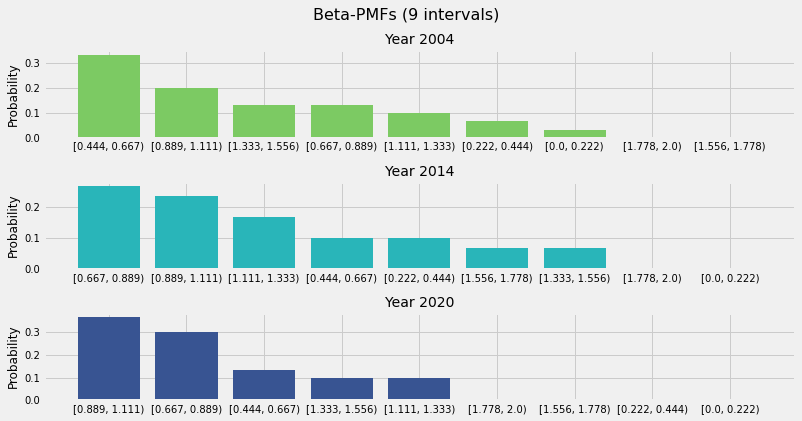

In [ ]:
# Plot PMFs side-to-side
import matplotlib.pyplot as plt
import seaborn as sns

# Use "fivethiryeight" style
plt.style.use("fivethirtyeight")

# Create figure grid that allows plotting 2 charts below each other
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (12,6))
# Plot PMF-charts for beta_2004 and beta_2020
ax[0].bar(pmf_2004.index, pmf_2004["Beta"], color = "#7CCA63")
ax[1].bar(pmf_2014.index, pmf_2014["Beta"], color = "#29B5B9")
ax[2].bar(pmf_2020.index, pmf_2020["Beta"], color = "#385492")
# Label y-axes
ax[0].set_ylabel("Probability",fontsize = 12)
ax[1].set_ylabel("Probability",fontsize = 12)
ax[2].set_ylabel("Probability",fontsize = 12)
# Reduce tick label size
ax[0].tick_params(axis = "both", labelsize = 10)
ax[1].tick_params(axis = "both", labelsize = 10)
ax[2].tick_params(axis = "both", labelsize = 10)
# Define subtitles
ax[0].set_title("Year 2004", fontsize = 14)
ax[1].set_title("Year 2014", fontsize = 14)
ax[2].set_title("Year 2020", fontsize = 14)
# Define horizontal space between PMF-plots
plt.subplots_adjust(hspace = 0.5)
# Create title
plt.suptitle("Beta-PMFs (9 intervals)", fontsize = 16)

plt.show()

**Difference of PMFs**

- The difference of PMFs can help to understand patterns better and identify deviations as clear as possible.
- In order to determine difference and understand distributions better, we must consider identical discrete values for the x-axis of both data1 and data2.
- A function that calculates the differences in PMFs for already defined intervals is provided below.
- Before can apply the **`diff_of_pmfs`**-function the manually constructed intervals must be transformed such that pandas function `.sort()` can be applied. Python modules that you might find useful are **`portion`** and **`ast`**.
- To implement the Difference of PMFs in Python one can apply the following function:
```
# Function that allows for PMF-difference computation
def diff_of_pmfs(pmf1, pmf2):
  diff_pmfs = []
  for i in pmf1 and j in pmf2:
    diff = 100 * (pmf1[i] - pmf2[j])
    diff_pmfs.append(diff)
    
  return diff_pmfs
```



## 4) Empirical Cumulative Distribution Functions (ECDFs)


- The CDF is the function that maps from a value to its percentile rank. E.g. the percentile rank is the fraction of people who scored lower than you (or the same). So if you are “in the 90th percentile,” you did as well as or better than 90% of the people who took the exam.
- The CDF is a function of x, where x is any value that might appear in the distribution. To evaluate CDF(x) for a particular value of x, we compute the fraction of values in the distribution **less than or equal to x**.
- The CDF of a sample is a step function.
- Percentile ranks are useful for comparing measurements across different groups.

_____________________________
**Advantages:**
- The empirical cumulative distribution function (ECDFs) avoids the binning problems of PMFs.
- It takes some time to get used to CDFs, but they show more information, more clearly, than PMFs.

_____________________
**Glossary:**
- ***Percentile rank***: The percentage of values in a distribution that are less than or equal to a given value.
- ***Percentile***: The value associated with a given percentile rank
- ***Replacement***: A property of a sampling process. “With replacement” means that the same value can be chosen more than once; “without replacement” means that once a value is chosen, it is removed from the population.


____________________

**Calculation of Percentile-based Summary Statistics**

- **50th Percentile**: is the value that divides the distribution in half, also known as the median.
- **Interquartile Range (IQR)**: is a measure of the spread of a distribution. It is the difference between the 75th and 25th percentiles
- **Quintile**: Split distribution at 20th, 40th, 60th and 80th percentiles

**Data Preprocessing**


In [ ]:
# Streamline dax_df such that only relevant data is considered #################
betas = dax_df[["Unternehmen", "Sektor", "Industrie", "Jahr", "Beta"]]
betas.head()

,Unternehmen,Sektor,Industrie,Jahr,Beta
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.50
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.51
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.58
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.03
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.49


In [ ]:
# Subset Dataframes for respective years: 2004, 2012, 2020 #####################
betas_2004_df = betas.loc[betas["Jahr"] == 2004, ["Beta"]]
betas_2014_df = betas.loc[betas["Jahr"] == 2014, ["Beta"]]
betas_2020_df = betas.loc[betas["Jahr"] == 2020, ["Beta"]]

# Transform df into np.array ###################################################
betas_2004 = betas_2004_df["Beta"].to_numpy()
betas_2014 = betas_2014_df["Beta"].to_numpy()
betas_2020 = betas_2020_df["Beta"].to_numpy()

**Definition of ECDF-Function**

In [ ]:
# Write ECDF Function ########################################################## 

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

**Computation of ECDFs**

In [ ]:
# Generate ECDFs ###############################################################
x_04, y_04 = ecdf(betas_2004)
x_14, y_14 = ecdf(betas_2014)
x_20, y_20 = ecdf(betas_2020)

print("x_04:", x_04, "y_04:", y_04)
print("x_14:", x_14, "y_14:", y_14)
print("x_20:", x_20, "y_20:", y_20)

x_04: [0.21 0.23 0.38 0.46 0.5  0.52 0.52 0.53 0.54 0.55 0.56 0.59 0.62 0.8
 0.82 0.82 0.88 0.9  0.94 0.95 0.99 1.07 1.1  1.13 1.14 1.14 1.39 1.42
 1.43 1.53] y_04: [0.03333333 0.06666667 0.1        0.13333333 0.16666667 0.2
 0.23333333 0.26666667 0.3        0.33333333 0.36666667 0.4
 0.43333333 0.46666667 0.5        0.53333333 0.56666667 0.6
 0.63333333 0.66666667 0.7        0.73333333 0.76666667 0.8
 0.83333333 0.86666667 0.9        0.93333333 0.96666667 1.        ]
x_14: [0.27 0.34 0.44 0.5  0.56 0.66 0.68 0.69 0.79 0.8  0.82 0.82 0.88 0.88
 0.9  0.93 0.97 1.08 1.09 1.11 1.11 1.18 1.21 1.3  1.3  1.33 1.4  1.5
 1.62 1.76] y_14: [0.03333333 0.06666667 0.1        0.13333333 0.16666667 0.2
 0.23333333 0.26666667 0.3        0.33333333 0.36666667 0.4
 0.43333333 0.46666667 0.5        0.53333333 0.56666667 0.6
 0.63333333 0.66666667 0.7        0.73333333 0.76666667 0.8
 0.83333333 0.86666667 0.9        0.93333333 0.96666667 1.        ]
x_20: [0.47 0.52 0.57 0.65 0.69 0.71 0.73 0.74 0.78 0.

**Visualization of ECDFs**

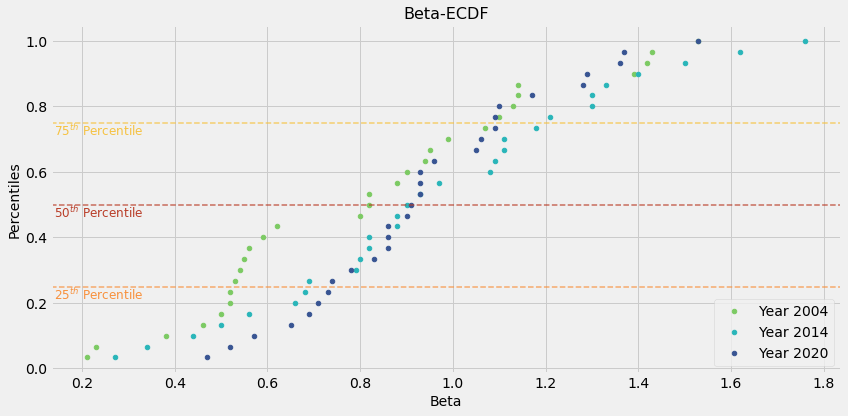

In [ ]:
# Plot ECDFs ###################################################################

# Define style in use
plt.style.use("fivethirtyeight")
plt.figure(figsize= (12,6))

# Plot ECDFs
plt.plot(x_04, y_04, marker = ".", markersize = 9, linestyle = "none", color = "#7CCA63")
plt.plot(x_14, y_14, marker = ".", markersize = 9, linestyle = "none", color = "#29B5B9")
plt.plot(x_20, y_20, marker = ".", markersize = 9, linestyle = "none", color = "#385492")

# Add annotations
plt.legend(("Year 2004", "Year 2014", "Year 2020"), loc = "lower right", frameon = True)
plt.axhline(y = 0.75 , color = "#F6C242", linestyle = "--", linewidth = 1.5, alpha = 0.75)
plt.axhline(y = 0.5 , color = "#B93D28", linestyle = "--", linewidth = 1.5, alpha = 0.75)
plt.axhline(y = 0.25 , color = "#F8913D", linestyle = "--", linewidth = 1.5, alpha = 0.75)

plt.annotate("$75^{th}$ Percentile", xy = (0.14,0.71), color = "#F6C242", fontsize = 12)
plt.annotate("$50^{th}$ Percentile", xy = (0.14,0.46), color = "#B93D28", fontsize = 12)
plt.annotate("$25^{th}$ Percentile", xy = (0.14,0.21), color = "#F8913D", fontsize = 12)
# Set Plot titles
plt.title("Beta-ECDF", fontsize = 16)
plt.xlabel("Beta", fontsize = 14)
plt.ylabel("Percentiles", fontsize = 14)

# Enhance Layout
plt.tight_layout()

plt.show()

##5) Probability Density Functions (PDFs)

**Description**:
- The derivative of a CDF is called a probability density function, or PDF.
- Evaluating a PDF for a particular value of x is usually not useful. The result is not a probability; it is a probability density.
- In physics, density is mass per unit of volume; in order to get a mass, you have to multiply by volume or, if the density is not constant, you have to integrate over volume. Similarly, probability density measures probability per unit of x. In order to get a probability mass, you have to integrate over x.
- ***Kernel density estimation (KDE)*** is an algorithm that takes a sample and finds an appropriately smooth PDF that fits the data.
_________________________________

**Purpose / Application**:
- ***Visualization***:During the exploration phase of a project, CDFs are usually the best visualization of a distribution. After you look at a CDF, you can decide whether an estimated PDF is an appropriate model of the distribution.
- ***Interpolation***: An estimated PDF is a way to get from a sample to a model of the population.
- ***Simulation***: If the sample size is small, it might be appropriate to smooth the sample distribution using KDE, which
allows the simulation to explore more possible outcomes, rather than replicating the observed data.

__________________________________
**Skewness**:
- Skewness is a property that describes the shape of a distribution. - If the distribution is symmetric around its central tendency, it is unskewed. If the values extend farther to the right, it is “***right skewed***” and if the values extend left, it is “***left skewed***.”
- Extreme values have more effect on the mean than the median, so in a distribution that ***skews left***, the mean is less than the median. In a distribution that ***skews right***, the mean is greater.

__________________________________
**Glossary**:
- ***Probability density function (PDF)***: The derivative of a continuous CDF, a function that maps a value to its probability
density.
- ***Probability density***: A quantity that can be integrated over a range of values to yield a probability.
- ***Kernel density estimation (KDE)***: An algorithm that estimates a PDF based on a sample.
- ***Skewness***: A measure of how asymmetric a distribution is.
- ***Robustness***:


**Visualization of Probability Density Function (PDF)**

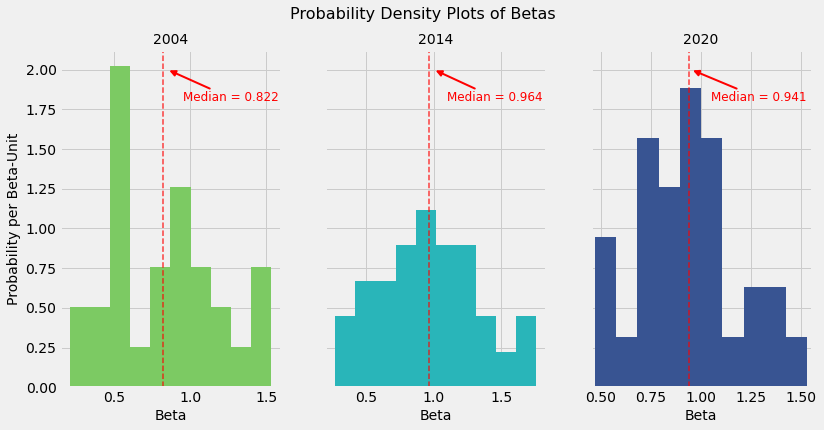

In [ ]:
#Plotting all three histograms of the Beta-mean
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (12, 6))

# Plot ECDF from original data
ax[0].hist(betas_2004, bins = 10, color = "#7CCA63", density = True)
ax[1].hist(betas_2014, bins = 10, color = "#29B5B9", density = True)
ax[2].hist(betas_2020, bins = 10, color = "#385492", density = True)

ax[0].axvline(x = np.mean(betas_2004), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[1].axvline(x = np.mean(betas_2014), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)
ax[2].axvline(x = np.mean(betas_2020), color = "red", linestyle = "--", linewidth = 1.5, alpha = 0.75)


# Make margins and label axes
plt.margins(0.02)
ax[0].set_xlabel("Beta", fontsize = 14)
ax[0].set_ylabel("Probability per Beta-Unit", fontsize = 14)

ax[1].set_xlabel("Beta", fontsize = 14)
ax[2].set_xlabel("Beta", fontsize = 14)

ax[0].set_title("2004", fontsize = 14)
ax[1].set_title("2014", fontsize = 14)
ax[2].set_title("2020", fontsize = 14)

#ax[0].set_xlim(0.6, 1.3)
#ax[1].set_xlim(0.6, 1.3)
#ax[2].set_xlim(0.6, 1.3)

# Make Annotations using arrow
ax[0].annotate("Median = 0.822",xy = (0.85, 2.0), xytext = (0.95, 1.8), color = 'red', fontsize = 12, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[1].annotate("Median = 0.964",xy = (1.0, 2.0), xytext = (1.1, 1.8), color = 'red', fontsize = 12, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil
ax[2].annotate("Median = 0.941",xy = (0.95, 2.0), xytext = (1.05, 1.8), color = 'red', fontsize = 12, 
               arrowprops={"arrowstyle":"-|>", "lw": 2, "color":"red"}) # Mit Pfeil

fig.suptitle("Probability Density Plots of Betas", fontsize = 16)

# Show the plot
plt.subplots_adjust(bottom = 0.1)
plt.show()


**Visualization of Kernel Density Estimation (KDE)**

In [ ]:
dax_df.head()


,Unternehmen,Sektor,Industrie,Jahr,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_GB_nSt,WACC_GB_vSt,Eigenkapitalquote_MKT,Fremdkapitalquote_MKT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,risikoloser Zins
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,NaN,0.326,0.674,0.0711,0.0585,0.04950,0.50,0.0410
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,NaN,0.381,0.619,0.0716,0.0500,0.05717,0.51,0.0407
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,NaN,0.581,0.419,0.0729,0.0687,0.06698,0.58,0.0338
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,NaN,0.664,0.336,0.0397,0.0397,0.03925,0.03,0.0378
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,NaN,0.466,0.534,0.0712,0.0784,0.05391,0.49,0.0423


In [ ]:
##### Data Preprocessing #######################################################

# Subset "Jahr" and "Beta" column
dax_year_beta = dax_df[["Jahr", "Beta"]]

# Restrict dataframe only for the years 2004, 2014, 2020
betas_041420 = dax_year_beta[(dax_year_beta["Jahr"] == 2004) | 
                               (dax_year_beta["Jahr"] == 2014) | 
                               (dax_year_beta["Jahr"] == 2020)]

# View shape to check for completeness of Beta values
betas_041420.shape

(90, 2)

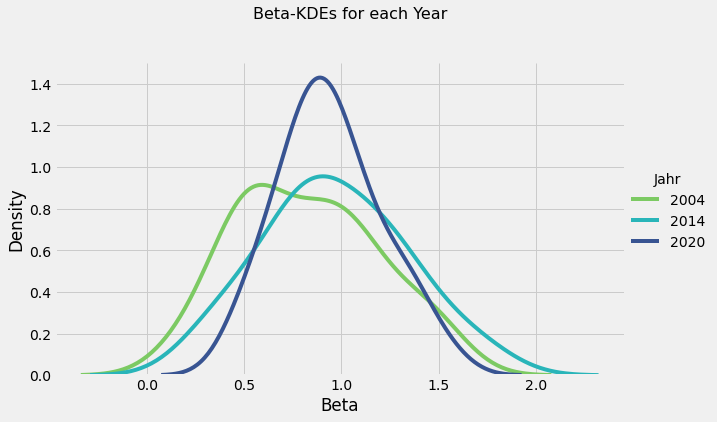

In [ ]:
import seaborn as sns

g = sns.FacetGrid(betas_041420, hue = "Jahr", height = 6, sharey = True, aspect = 1.5, hue_kws = {"color": ["#7CCA63", "#29B5B9", "#385492"]})
g.map(sns.kdeplot, "Beta")
g.fig.subplots_adjust(top = 0.85) # adjust the Figure in rp
g.fig.suptitle('Beta-KDEs for each Year', fontsize = 16)
g.add_legend()

## Final thoughts on further analyses

This introductory notebook on statistical distribution thinking conveys basic statistical principles such as distributions, summary statistics and various plot methods that are mandatory for ever data exploration process. However in the particular use case of mine, which is the analysis of Cost of Capital computation, I feel the following advanced analytics are of great importance:
- ***Bootstrapping*** as a resampling method refers to statistical approach to quantifying uncertainty by re-using the data, specically random resampling with replacement.
- ***Permutation*** analyses typically seek to quantify the null distribution. Thus, permutation-based analyses resemble the bootstrap in that they rely on randomizations of
the observed data.
- ***Simulation***